##### 트라이
- 문자열 검색을 빠르게 실행할 수 있도록 설계한 트리 형태의 자료구조
- 래딕스 트리(radix tree)나 접두사 트리(prefix tree)라고도 한다.

- 사용 목적
    - 문자열의 탐색을 할 때, 단순하게 하나씩 비교하면서 탐색을 하는것보다 시간복잡도 측면에서 훨씬 효율적이다. 
    - 단, 빠르게 탐색이 가능하다는 장점이 있지만 각 노드에서 자식들에 대한 포인터들을 배열로 모두 저장하고 있다는 점에서 <br>
    저장 공간의 크기가 크다는 단점도 있다.
    - 빠른 시간복잡도 덕분에 검색엔진 사이트에서 제공하는 자동 완성 및 검색어 추천 기능에서 Trie 자료구조를 사용한다.

##### Trie 자료구조의 형태
1. Trie 알고리즘은 노드를 이용한 Tree 형태로 이루어져 있다.
2. 문자열의 끝을 알리는 flag가 존재한다.
3. 아래 예시는 "A", "to", "tea", "ted", "ten", "i", "in", "inn"를 키로 둔 트라이 이다. 

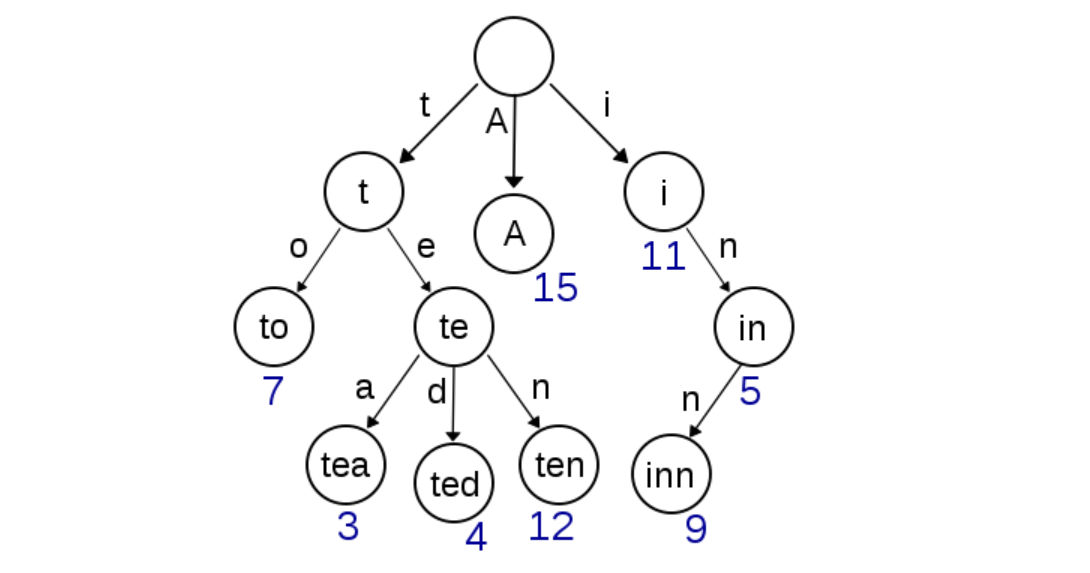

##### 시간 복잡도
- 트라이는 다음과 같은 시간 복잡도를 갖는다.
- 제일 긴 문자열의 길이를 m, 총 문자열들의 수를 n이라 할 때
    - 생성시 시간 복잡도 : O(m*n)
    - 삽입 시간 복잡도 : O(m)
    - 탐색시 시간 복잡도 : O(m)

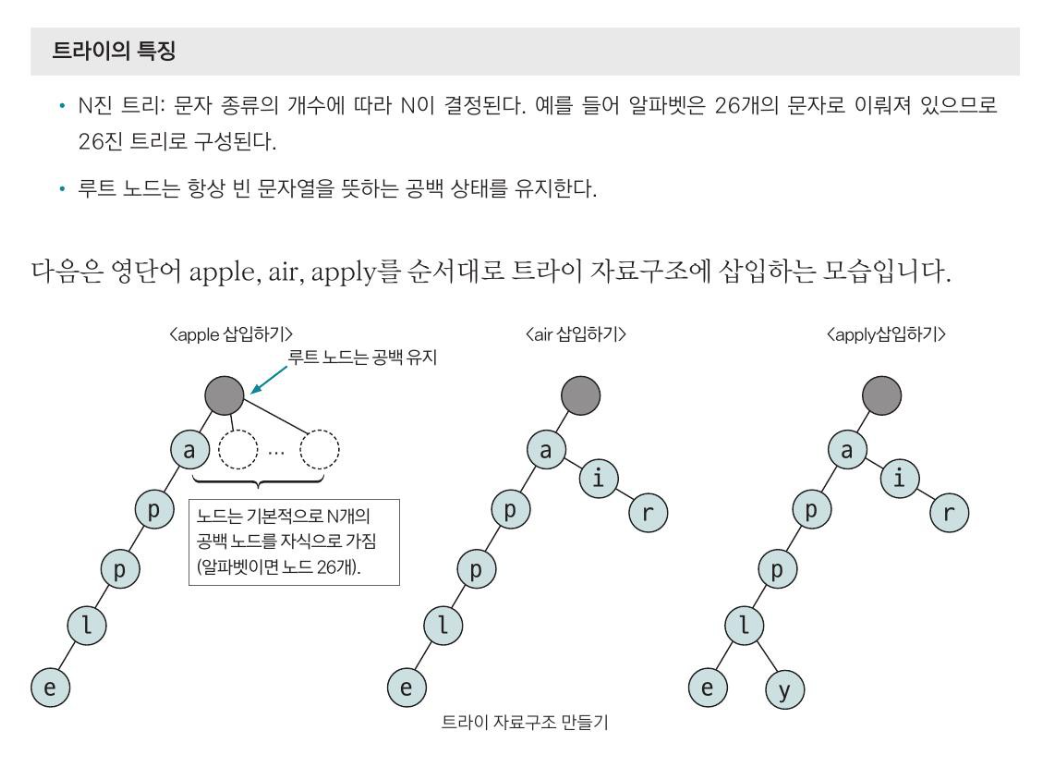

##### [문제] 문자열 찾기

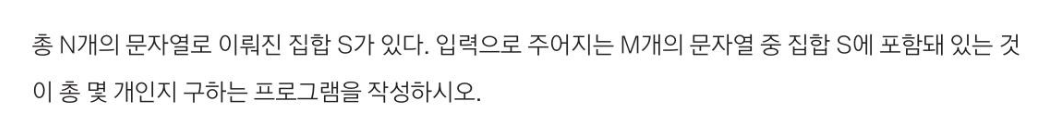

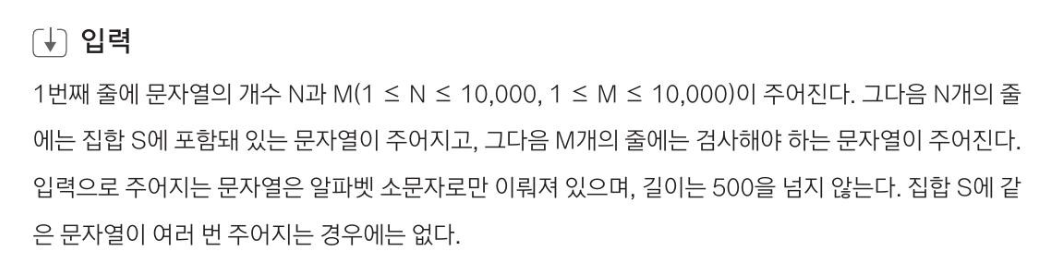

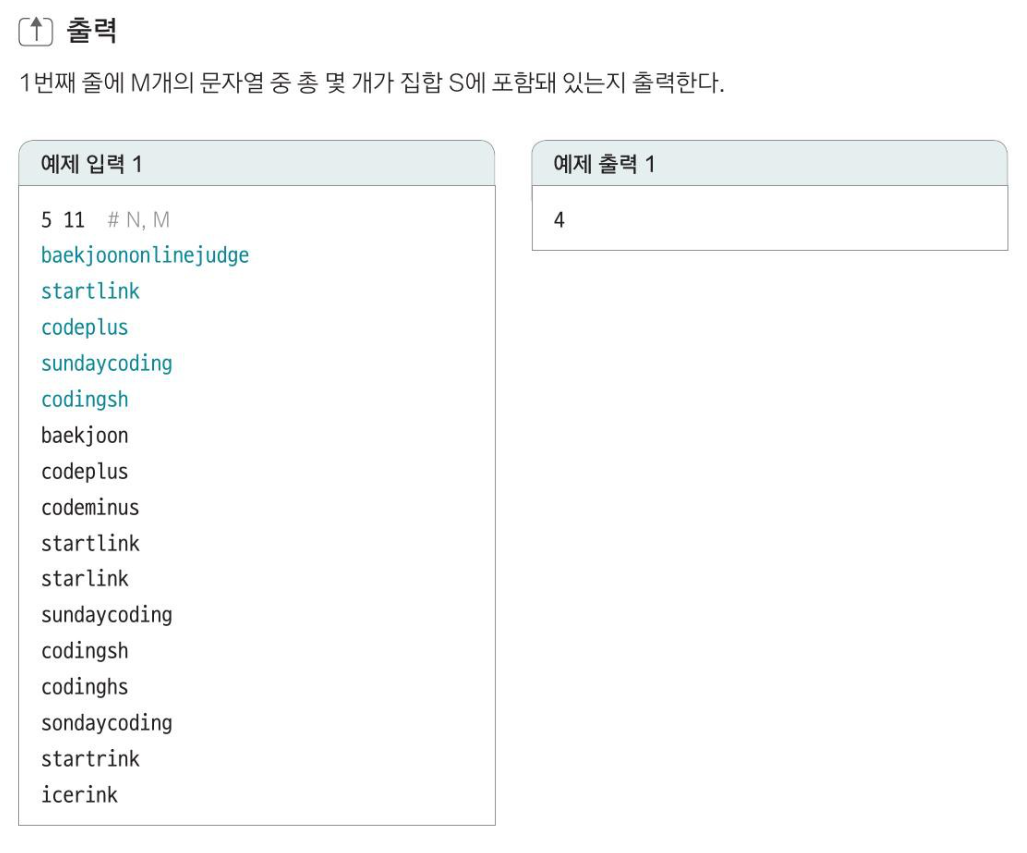

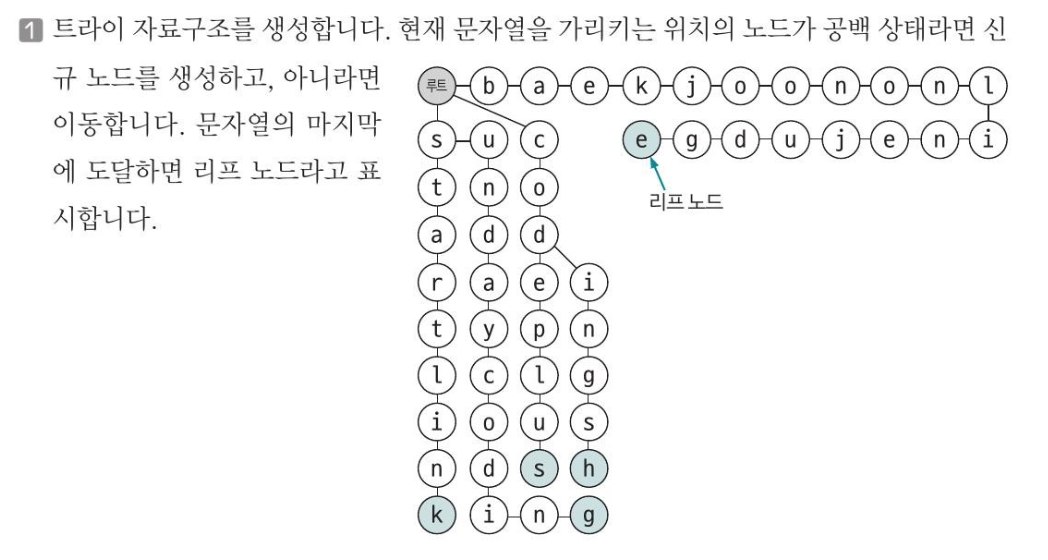

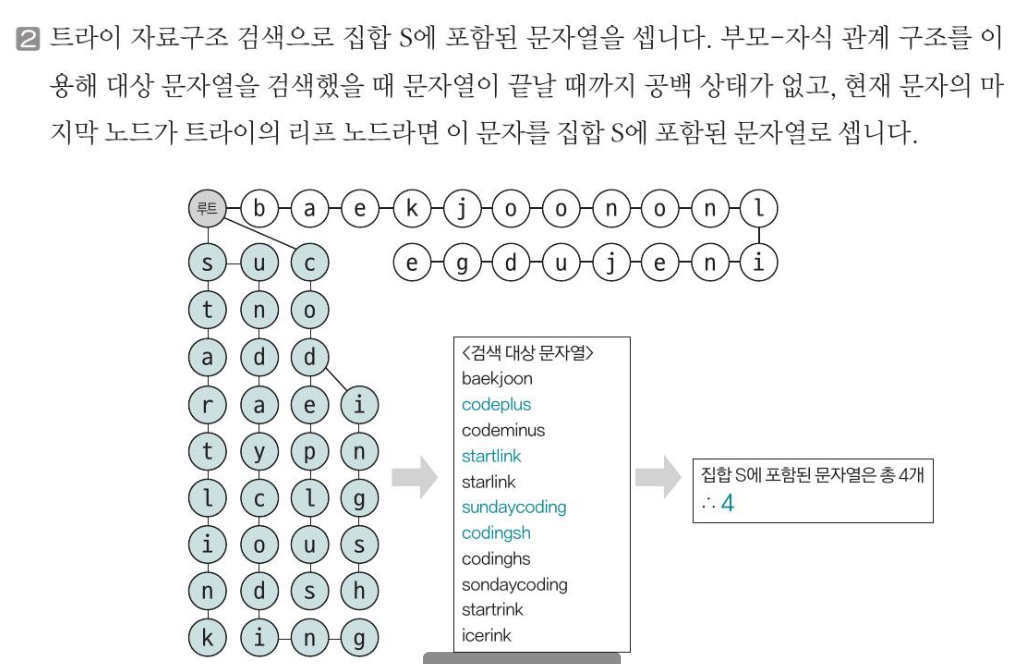

##### Node 구현
- 노드에는 세가지가 필요합니다.
    1. key - 값으로 입력될 문자
    2. data - 문자열의 종료를 알리는 flag. ( True/False로도 구현할 수 있지만, 돌아가는 일이 없게 하기위해 전체 문자열을 저장)
    3. children - 자식노드를 저장

In [1]:
# Node 구현

class Node(object):
    def __init__(self, key, data=None):
        self.key = key
        self.data = data
        self.children = {}


In [3]:
# Trie 구현
class Trie(object):
    def __init__(self):
        self.head = Node(None)  # 빈 노드 생성
    
    # 문자열 삽입
    def insert(self, string):
        curr_node = self.head
        # 삽입할 문자열의 각각의 문자에 대해 자식 노드를 만들며 내려간다.
        for char in string:
            if char not in curr_node.children:
                curr_node = curr_node.add(char) # 자식 노들들 중에서 문자가 일치하는 노드가 없으면 새 노드를 만든다.
            
            curr_node = curr_node.children[char] # 같은 문자가 있으면, 해당 노드로 이동한다.
        
        curr_node.data = string # 문자열이 끝난 지점의 노드의 data 필드에 해당 문자열을 표시한다.
    
    # 문자열 검색
    def search(self, string):
        # 가장 아래에 있는 노드에서 부터 탐색을 시작한다.
        curr_node = self.head
        for char in string:
            if char in curr_node.children:
                curr_node = curr_node.children[char]
            else:
                return False
        
        # 탐색이 종도되면 해당 노드의 data를 반환한다. data가 없으면 False를 반환한다.
        # 문자가 포함되어 있다.
        if (curr_node.data != None):
            return True
        
n, m = map(int, input().split())

myTrie = Trie() # 트라이 객체 생성

for _ in range(n):
    myTrie.insert(input().split()) # 문자열 삽입
    
result = 0 # 검색된 문자열의 개수
for _ in range(m):
    if myTrie.search(input().split()): # 문자열이 존재하면
        result += 1 # 개수 증가
        
print(result)
    

11
